#                                                  ANZ VIRTUAL INTERNSHIP 

In [1]:
import pandas as pd 
import sweetviz as sv
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

In [2]:
data_transaction = pd.read_excel('ANZ synthesised transaction dataset.xlsx')

In [3]:
data_transaction.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


# EXPLORATORY DATA ANALYSIS

In [4]:
#Profiling the dataset
#profile = data_transaction.profile_report()
#profile

**Avg transaction amount** : 187.933588 $


In [5]:
#Transaction description (types of transaction ) 
data_transaction.txn_description.value_counts(dropna = False)

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

C:\Users\iscar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of transactions by category')

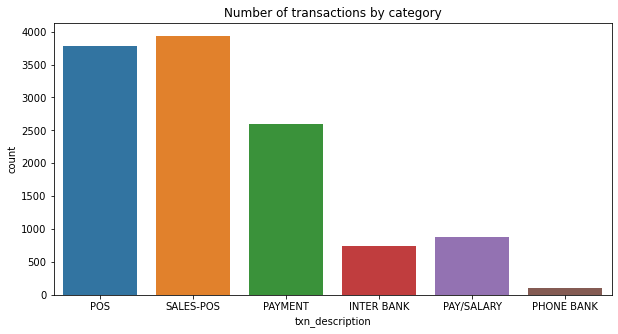

In [6]:
#Plotting the types of transaction 
plt.figure(figsize = (10, 5))
sns.countplot(data_transaction.txn_description)
plt.title("Number of transactions by category")

**These are the descriptions for each transaction. We can notice that transactions mostly consist of sales payment.**

Text(0.5, 1.0, 'Average transaction volume by category')

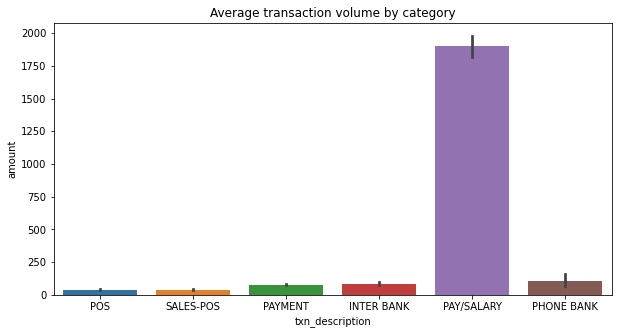

In [7]:
#AVerage transaction volume by category 
plt.figure(figsize = (10, 5))
sns.barplot(x="txn_description", y="amount", data=data_transaction)
plt.title("Average transaction volume by category")

**Pay/salary has the largest average transaction volume.Seems logical**

C:\Users\iscar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of transactions by gender')

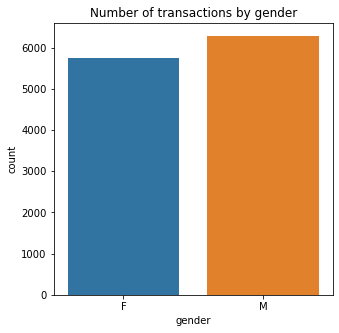

In [8]:
#Gender 
plt.figure(figsize = (5, 5))
sns.countplot(data_transaction.gender)
plt.title("Number of transactions by gender")

**There more male customers than female customers**

In [9]:
#Average transaction volume by gender 
data_transaction[["gender", "amount"]].groupby("gender", as_index = False).mean().sort_values(by = "amount", ascending = False)

,gender,amount
1,M,205.721809
0,F,168.517303


Text(0.5, 1.0, 'Average transaction volume by gender')

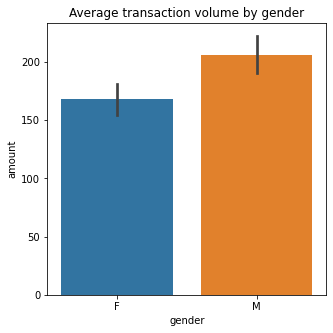

In [10]:
#Plot of average transaction volume by gender 
plt.figure(figsize = (5, 5))
sns.barplot(x="gender", y="amount", data = data_transaction)
plt.title("Average transaction volume by gender")

C:\Users\iscar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of transactions by state')

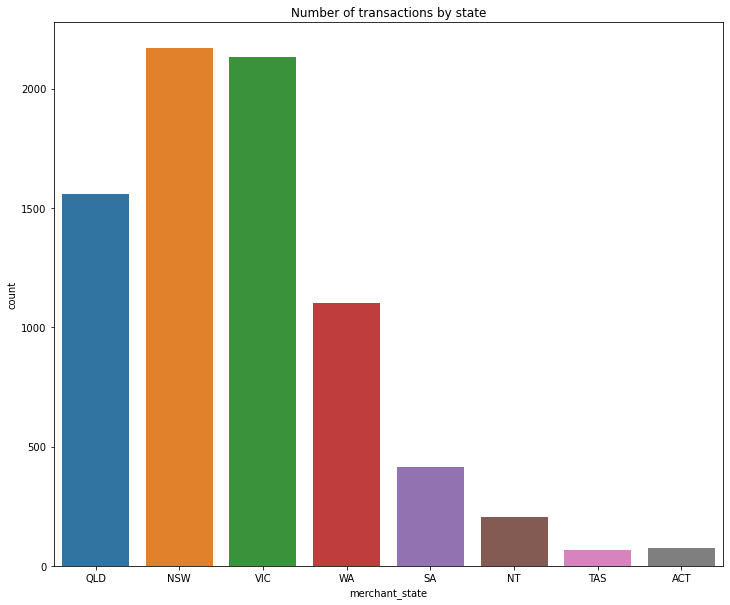

In [11]:
#Number of transactions by state 
plt.figure(figsize = (12, 10))
sns.countplot(data_transaction.merchant_state)
plt.title("Number of transactions by state")

**Top 3 states : NSW , VIC , QLD**

Text(0.5, 1.0, 'Average transaction volume by state')

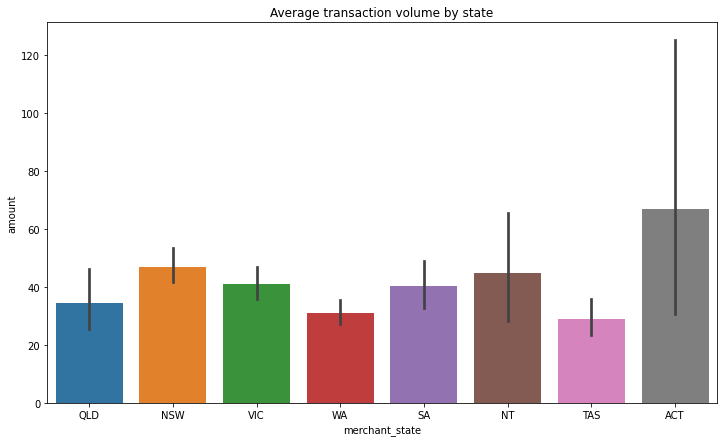

In [12]:
#Average transaction volume by state
plt.figure(figsize = (12, 7))
sns.barplot(x = "merchant_state", y = "amount", data = data_transaction)
plt.title("Average transaction volume by state")

**ACT has the highest average transaction volume but the variance is quite large.**

C:\Users\iscar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age distribution')

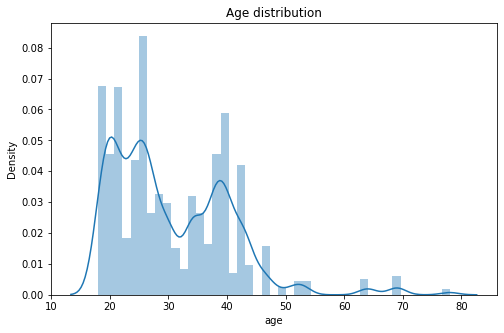

In [13]:
#Age distribution 

plt.figure(figsize = (8, 5))
sns.distplot(data_transaction.age)
plt.title("Age distribution")

**The majority of customers are between 20-25 years old**.

C:\Users\iscar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age distribution')

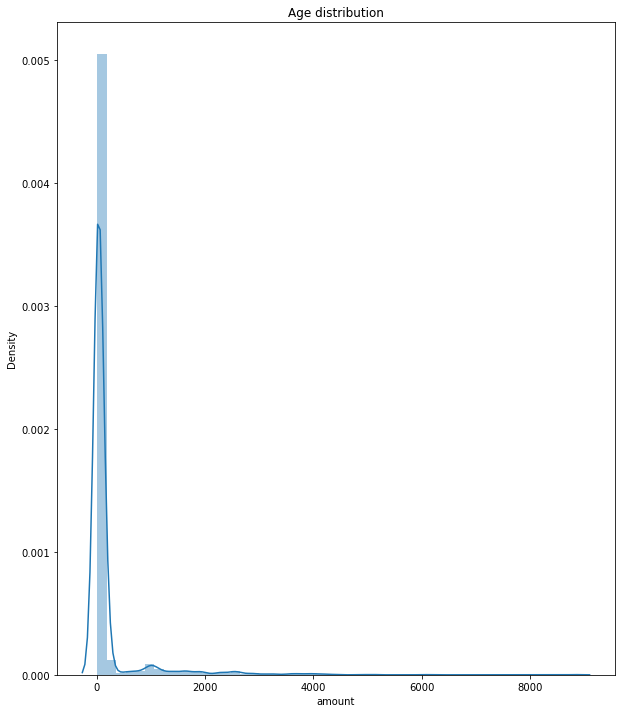

In [14]:
#Transaction amount 
plt.figure(figsize = (10, 12))
sns.distplot(data_transaction.amount)
plt.title("Age distribution")

## Feature engineering

In [15]:
#Dropping unwanted columns
data = data_transaction.drop(["currency", "country"], axis = 1)

In [16]:
#Dealing with missing values 
nonSales = data_transaction.loc[(data_transaction.txn_description != "SALES-POS") | (data.txn_description != "POS"), :]
nonSales.isnull().sum().sort_values(ascending = False)

merchant_code        11160
bpay_biller_code     11158
card_present_flag     4326
merchant_state        4326
merchant_suburb       4326
merchant_id           4326
merchant_long_lat     4326
movement                 0
first_name               0
account                  0
currency                 0
long_lat                 0
txn_description          0
date                     0
balance                  0
gender                   0
age                      0
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
status                   0
dtype: int64

It appears that missing values in the following columns all originate from non-purchases transactions : 





**card_present_flag;
merchant_state;
merchant_suburb;
merchant_id;
merchant_long_lat**
    

In [17]:
#Filling missing values with n/a 
cols = ["card_present_flag", "merchant_state", "merchant_suburb", "merchant_id", "merchant_long_lat"]
for col in cols:
    data_transaction[col].fillna("n/a", inplace = True)
#dropping merchant_code and bpay_piller_code 
data_transaction = data_transaction.drop(["merchant_code", "bpay_biller_code"], axis = 1)

In [18]:
#checking if there is still missing data 
data_transaction.isnull().sum().max()

0

## Create features for month , dayofweek and hour 

In [19]:
#Daily amount 
daily_amount = pd.DataFrame(data_transaction.groupby("date").amount.sum())
daily_amount.head()

,amount
date,
2018-08-01,29867.94
2018-08-02,21786.32
2018-08-03,38096.58
2018-08-04,6296.05
2018-08-05,4426.50


Text(0, 0.5, 'Transaction volume')

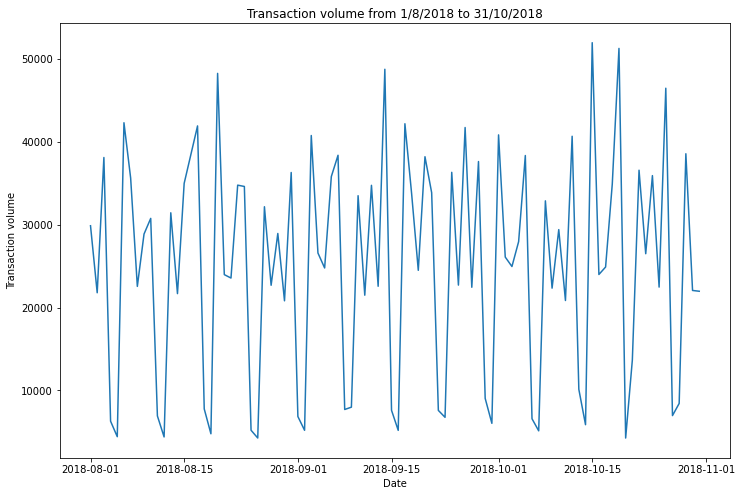

In [20]:
#Transaction volume from 1/8/2018 to 31/10/2018
fig, ax = plt.subplots(figsize = (12, 8))
ax.plot(daily_amount.index, daily_amount.amount)
plt.title("Transaction volume from 1/8/2018 to 31/10/2018")
plt.xlabel("Date")
plt.ylabel("Transaction volume")

**It seems that there is a cyclical pattern in transaction volume over the 3 month period.This can may be explained by : **


- Salaries are paid out only certain days of the week 




-  People tend to spend more during the weekends (shopping , out with friends ) 

In [21]:
#Creating 3 new features (month,dayofweek,hour)

data_transaction["month"] = pd.DatetimeIndex(data_transaction.date).month
data_transaction["dayofweek"] = pd.DatetimeIndex(data_transaction.date).dayofweek
data_transaction[["date", "month", "dayofweek"]].head()

,date,month,dayofweek
0,2018-08-01,8,2
1,2018-08-01,8,2
2,2018-08-01,8,2
3,2018-08-01,8,2
4,2018-08-01,8,2


In [22]:
#Extracting the hour where the transactions took place 
data_transaction.extraction.head()

0    2018-08-01T01:01:15.000+0000
1    2018-08-01T01:13:45.000+0000
2    2018-08-01T01:26:15.000+0000
3    2018-08-01T01:38:45.000+0000
4    2018-08-01T01:51:15.000+0000
Name: extraction, dtype: object

In [23]:
data_transaction["extraction"] = [timestamp.split("T")[1].split(".")[0] for timestamp in data_transaction.extraction]
data_transaction.extraction.head()

0    01:01:15
1    01:13:45
2    01:26:15
3    01:38:45
4    01:51:15
Name: extraction, dtype: object

In [24]:
data_transaction["hour"] = [time.split(":")[0] for time in data_transaction.extraction]
data_transaction[["extraction", "hour"]].head()

,extraction,hour
0,01:01:15,01
1,01:13:45,01
2,01:26:15,01
3,01:38:45,01
4,01:51:15,01


In [25]:
print("Before: ", data_transaction.hour.dtype)
data_transaction["hour"] = pd.to_numeric(data_transaction.hour)
print("After: ", data_transaction.hour.dtype)

Before:  object
After:  int64


# Broaden the scope of the analysis

Text(0.5, 1.0, 'Average transaction volume by month')

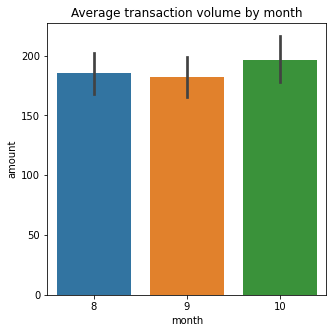

In [26]:
#Average transaction volume by month 
plt.figure(figsize = (5,5))
sns.barplot(x = "month", y = "amount", data = data_transaction)
plt.title("Average transaction volume by month")

Text(0.5, 1.0, 'Average transaction volume by day')

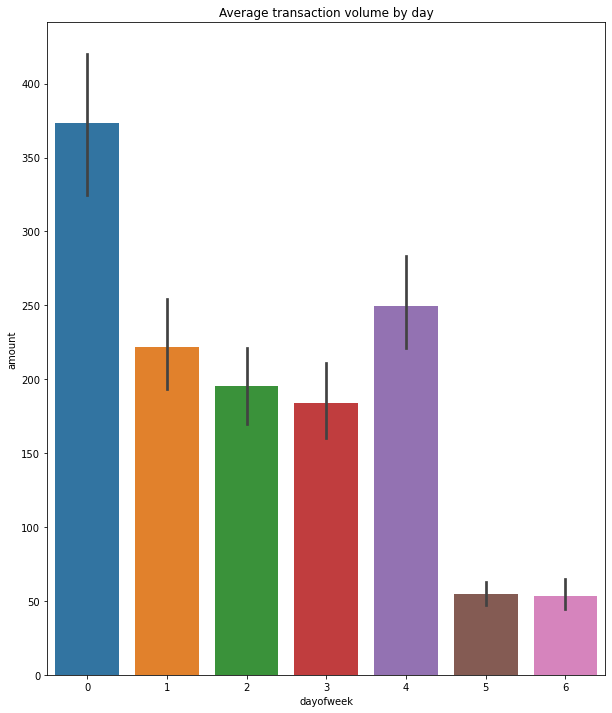

In [29]:
#Average transaction volume by day
plt.figure(figsize = (10,12))
sns.barplot(x = "dayofweek", y = "amount", data = data_transaction)
plt.title("Average transaction volume by day")

Friday and Saturday have the lowest average transaction volume. 
Let's breakdown those transactions by 3 types 


- Salary 


- Purchase 


- Others

In [32]:
#Grouping transactions into 3 categories 
data_transaction.loc[data_transaction.txn_description == "PAY/SALARY", "category"] = "Salary"
data_transaction.loc[(data_transaction.txn_description == "SALES-POS") | (data_transaction.txn_description == "POS"), "category"] = "Purchase"
data_transaction.category.fillna("Others", inplace = True)
data_transaction[["txn_description", "category"]].head(10)

,txn_description,category
0,POS,Purchase
1,SALES-POS,Purchase
2,POS,Purchase
3,SALES-POS,Purchase
4,SALES-POS,Purchase
5,PAYMENT,Others
6,SALES-POS,Purchase
7,POS,Purchase
8,POS,Purchase
9,INTER BANK,Others


Text(0.5, 0, 'Day of week')

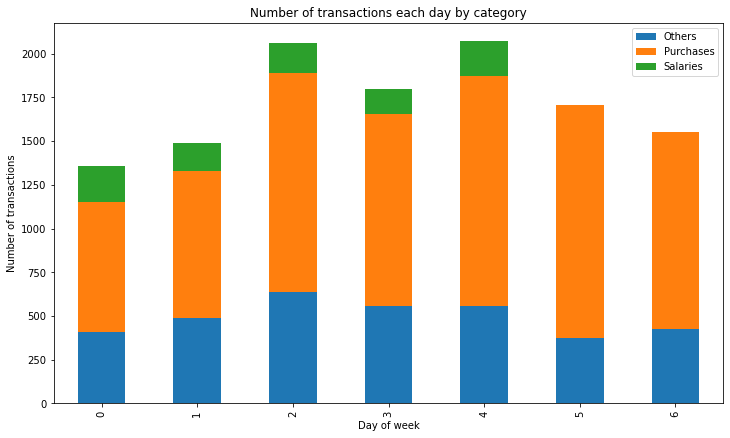

In [33]:
#Plotting number of transactions each day by category 
stacked_barplot = pd.DataFrame(data_transaction.groupby(["dayofweek", "category"]).amount.count())
stacked_barplot.unstack().plot(kind = "bar", stacked = True, figsize = (12, 7))
plt.title("Number of transactions each day by category")
plt.legend(["Others", "Purchases", "Salaries"])
plt.ylabel("Number of transactions")
plt.xlabel("Day of week")

**No salaries are paid on friday or saturday**


**People don't spend that much on purchases over the weekends.**

Text(0.5, 1.0, 'Average transaction volume by day')

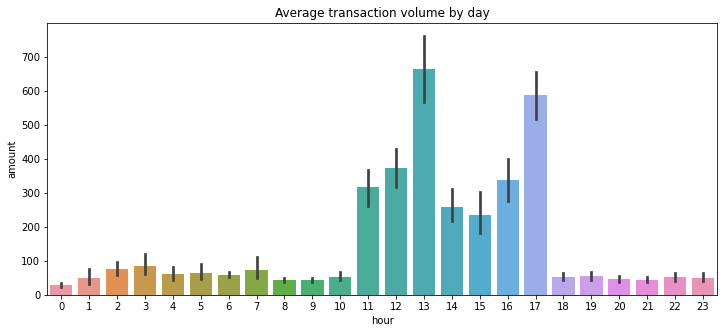

In [38]:
#Average transaction volume per hour 
plt.figure(figsize = (12,5))
sns.barplot(x = "hour", y = "amount", data = data_transaction)
plt.title("Average transaction volume by day")


**Highest transaction volumes happen during the midday and late afternoon**